Загрузим датафрейм с характеристиками животных

In [8]:
import pandas as pd
df = pd.read_csv('./dataset/zoo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Для классификации не будет использоваться вид животного. В результате классификации будет определяться класс животного

In [10]:
df = df.drop(["animal_name"], axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Далее подставим названия класса из второго файла. В первую очередь загружаем второй файл

In [11]:
df1 = pd.read_csv('./dataset/class.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 356.0+ bytes


In [12]:
df1

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


Выполняем подстановку при помощи map, формируя словарь подстановки из столбцов второго файла

In [13]:
df["class_type"] = df["class_type"].map(dict(zip(df1["Class_Number"], df1["Class_Type"])))
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammal
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate


<Axes: xlabel='class_type', ylabel='count'>

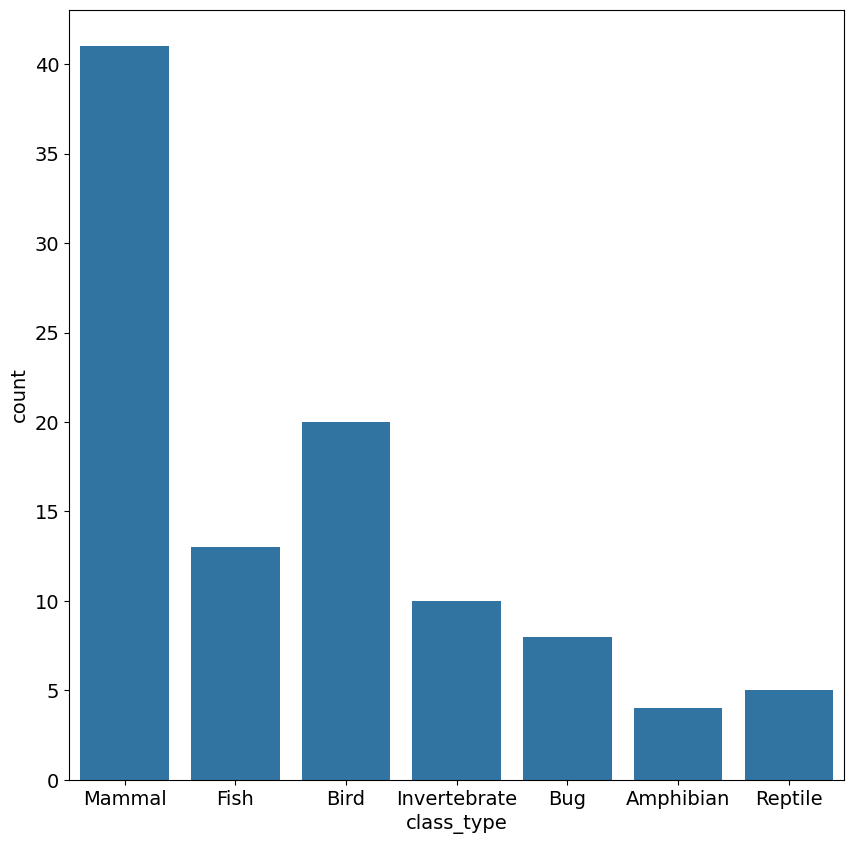

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize = (10,10))
sns.countplot(x=df["class_type"])

В x - параметры, в Y - классы

In [16]:
X = df.drop("class_type", axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [17]:
y = df["class_type"]
y.head()

0    Mammal
1    Mammal
2      Fish
3    Mammal
4    Mammal
Name: class_type, dtype: object

Разделение на выборку для обучения и тестирования

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1030)

Классификатор случайный лес

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

[Text(0, 0.5, 'Reptile'),
 Text(0, 1.5, 'Bird'),
 Text(0, 2.5, 'Invertebrate'),
 Text(0, 3.5, 'Fish'),
 Text(0, 4.5, 'Bug'),
 Text(0, 5.5, 'Mammal'),
 Text(0, 6.5, 'Amphibian')]

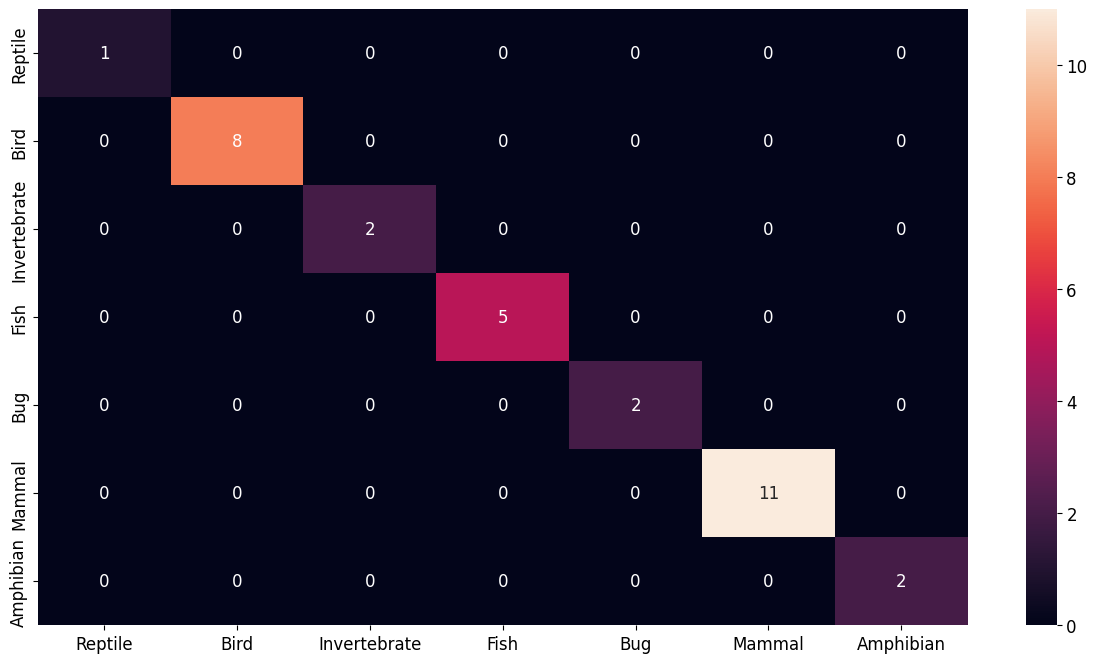

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
cf= confusion_matrix(y_test, pred)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (15,8))
ax = sns.heatmap(cf, annot=True)
ax.xaxis.set_ticklabels(['Reptile','Bird', 'Invertebrate','Fish','Bug','Mammal','Amphibian'])
ax.yaxis.set_ticklabels(['Reptile','Bird', 'Invertebrate','Fish','Bug','Mammal','Amphibian'])

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         8
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         5
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00        11
     Reptile       1.00      1.00      1.00         2

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf_probs = rf.predict_proba(X_test)
rf_auc = roc_auc_score(y_test,rf_probs,multi_class='ovr')
print('AUC: ', rf_auc)

AUC:  1.0


Сохранение модели

In [26]:
from pickle import dump
from pathlib import Path
Path("./models").mkdir(parents=True, exist_ok=True)

with open("./models/pipeline.pkl", "wb") as file:
    dump(rf, file)